<a href="https://colab.research.google.com/github/ReynaraEzra/Richter-Earthquake-Prediction/blob/main/Richter_Prediction_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Earthquake Damage to Building in Nepal (Part 1)**
## **Reynara Ezra Pratama**

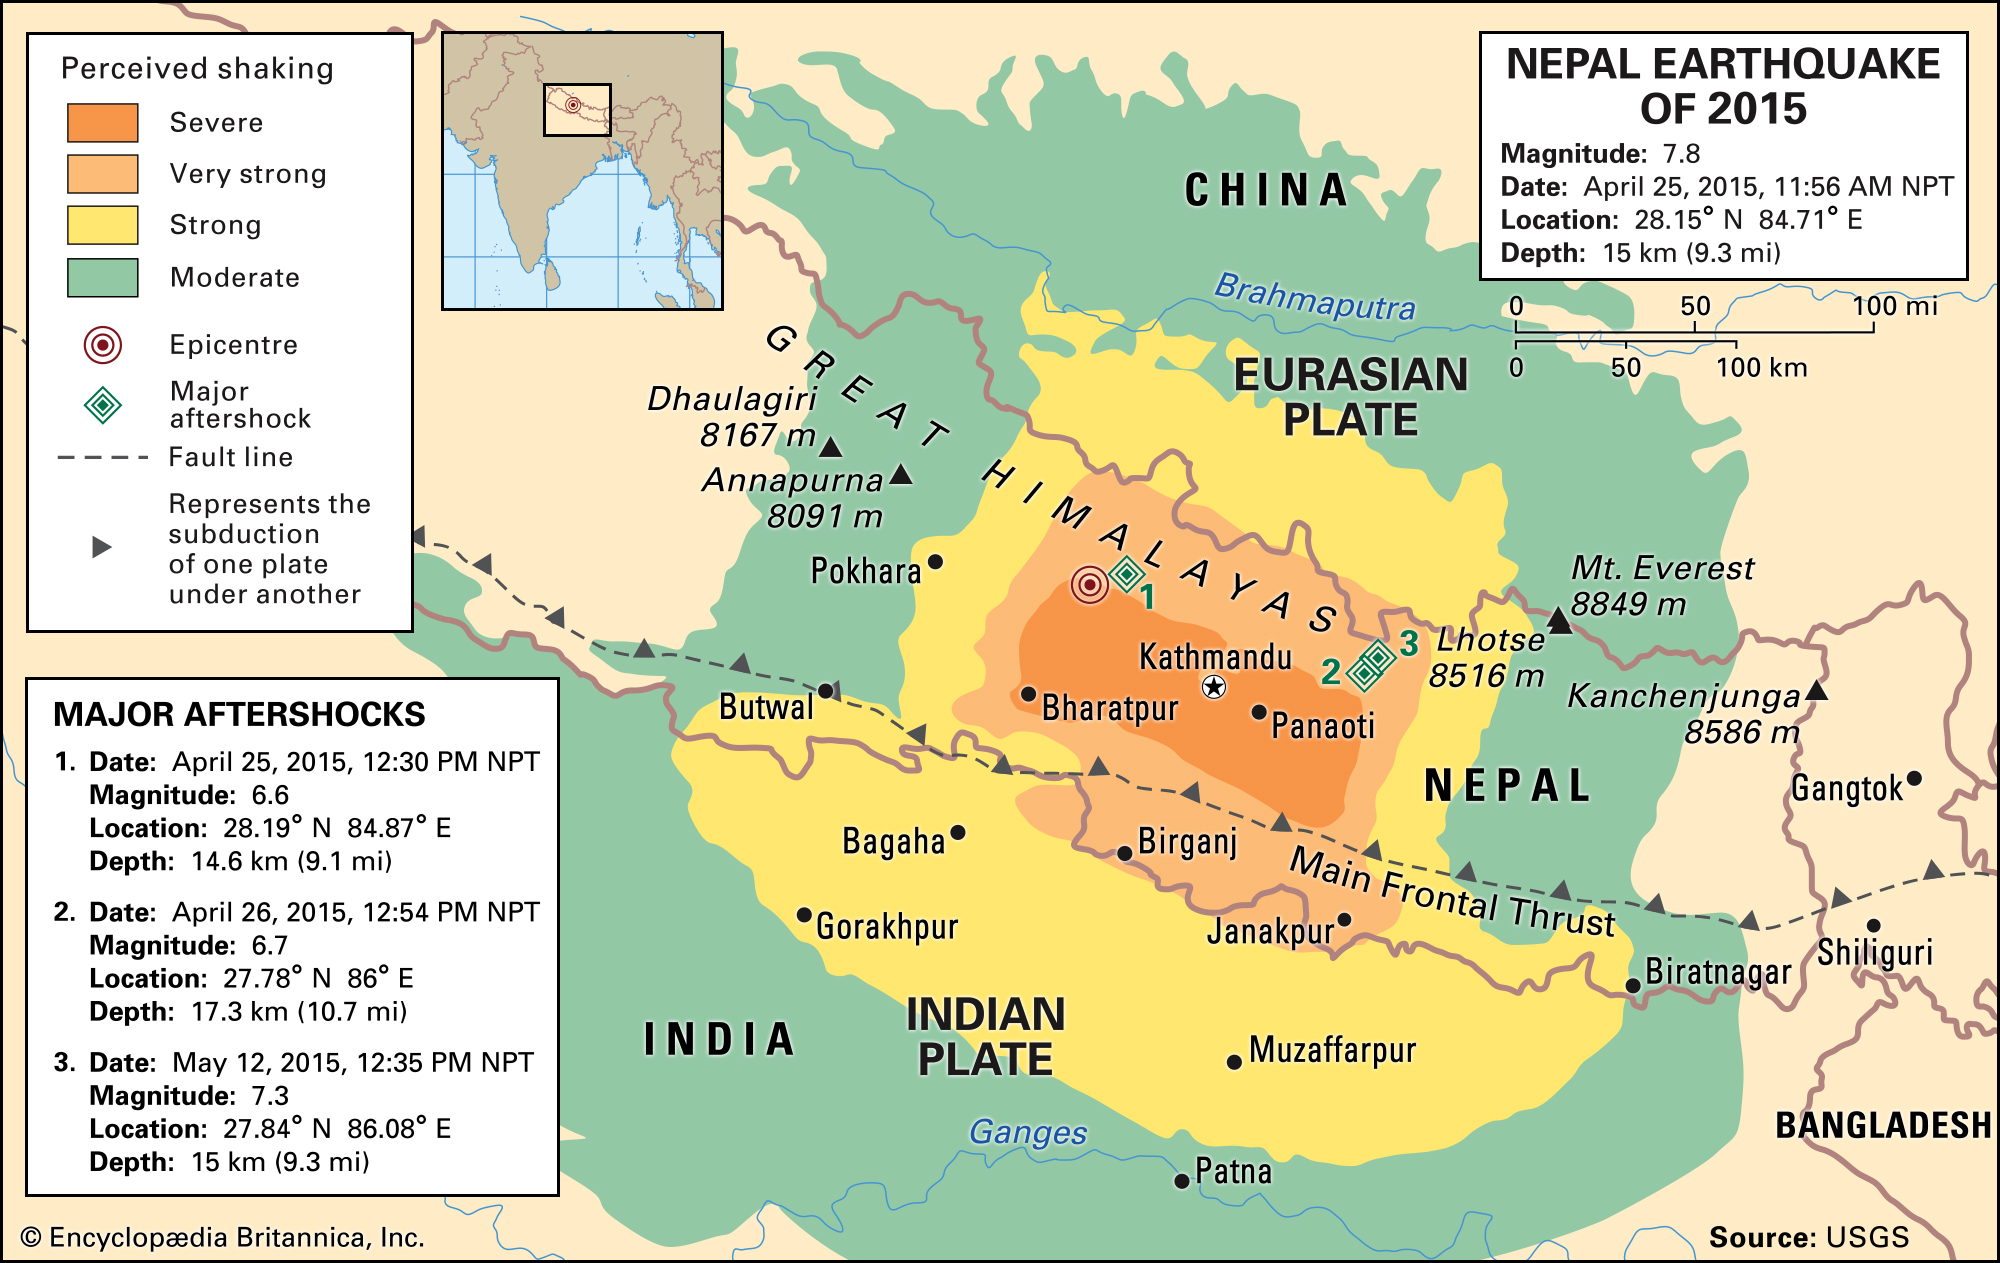

[Source : Britanica](https://cdn.britannica.com/90/182390-050-2221B963/earthquake-Map-Nepal-region-temblor-thousands-people-April-25-2015.jpg)

Pada tanggal 25 April 2015, terjadi gempa bumi berkekuatan 7,8 Skala Richter di Nepal. Pasca kejadian tersebut, dilakukan banyak penelitian dan penyelidikan di lapangan untuk melihat kerusakan yang terjadi pada bangunan yang terkena dampak dari gempa bumi tersebut. Dikarenakan jumlah bangunan dan variasi bangunan yang sangat banyak, proses penyelidikan pasca gempa menjadi sulit untuk dilakukan. Namun, dengan mengetahui deskripsi dari suatu bangunan, dapat membantu kita dalam menentukan tingkat kerusakan yang ada pada bangunan tersebut.




Data dikumpulkan melalui survei oleh [Kathmadu Living Labs](https://www.kathmandulivinglabs.org/) dan [Central Bureau of Statistics](https://cbs.gov.np/) yang bekerja di bawah Sekretariat Komisi Perencanaan Nasional Nepal. Survei ini merupakan salah satu kumpulan data pascabencana terbesar yang pernah dikumpulkan, yang berisi informasi berharga tentang dampak gempa bumi, kondisi rumah tangga, dan statistik sosio-ekonomi-demografis.

Adapun dataset pada permasalahan ini dapat dilihat pada [Earthquake Nepal 2015](https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/)

## **Business Understanding**


1.   Mendapatkan gambaran bagaimana kerusakan yang ada pada bangunan yang ada di Nepal
2.   Memprediksi level kerusakan bangunan yang terkena dampak gempa bumi Nepal 2015.
3.   Memberikan rekomendasi berupa material atau karakteristik spesifik yang dapat digunakan dalam membangun suatu bangunan untuk mengurangi dampak kerusakan yang ditimbulkan dari gempa bumi.

## **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Loading Dataset**

In [2]:
url_train_label = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_labels.csv'
url_train_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_values.csv'
url_test_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/test_values.csv'

train_label = pd.read_csv(url_train_label)
train_value = pd.read_csv(url_train_value)
test_value = pd.read_csv(url_test_value)

# **Checking Data**

In [3]:
print('Train Values : {}'.format(train_value.shape))
print('Train Labels : {}'.format(train_label.shape))
print('Test Values : {}'.format(test_value.shape))

Train Values : (260601, 39)
Train Labels : (260601, 2)
Test Values : (86868, 39)


In [4]:
print('Number of Training Data : {}'.format(train_value.shape[0]))
print('Number of Testing Data : {}'.format(test_value.shape[0]))
print('Total Data : {}'.format(train_value.shape[0]+test_value.shape[0]))

Number of Training Data : 260601
Number of Testing Data : 86868
Total Data : 347469


In [5]:
train_label.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
train_value.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test_value.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


## **Description**

**Penjelasan Label**

Pada permasalahan ini, kita akan memprediksi variabel ordinal ***damage_grade***, yang merepresentasikan level kerusakan dari suatu bangunan yang terdampak gempa bumi. Terdapat 3 buah level kerusakan yaitu :
*   **1** : Merepresentasikan kerusakan ringan
*   **2** : Merepresentasikan kerusakan sedang
*   **3** : Merepresentasikan kerusakan tinggi (hampir hancur seluruhnya)



**Penjelasan Feature** '

Pada feature memuat data tentang struktur bangunan dan kepemilikan legal dari bangunan tersebut. Setiap baris pada data tersebut menunjukkan suatu bangunan tertentu di wilayah yang terkena gempa.
Terdapat **39** kolom pada dataset, dimana kolom ***building_id*** adalah unik dan sebagai pengenal. Pada dataset, munculnya karakter yang sama pada kolom yang berbeda tidak menunjuk pada nilai asli yang sama. Adapun penjalasan dari **38** feature lainnya adalah :
*   ***geo_level_1_id***, ***geo_level_2_id***, dan ***geo_level_3_id*** (tipe:int) : Menunjukkan wilayah geografis tempat bangunan berada, dimulai dari tingkat terbesar (tingkat 1) hingga sub-kawasan spesifik (tingkat 3). Kemungkinan nilai : (level 1: 0-30), (level 2: 0-1427), (level 3: 0-12567).
*   ***count_floors_pre_eq*** (tipe:int) : Banyaknya jumlah lantai pada bangunan sebelum gempa bumi.
*   ***age*** (tipe:int) : Umur suatu bangunan dalam tahun.
*   ***area_percentage*** (tipe:int) : Luas bangunan yang dinormalisasi.
*   ***height_percentage*** (tipe:int) : Tinggi bangunan yang dinormalisasi.
*   ***land_surface_condition*** (tipe:kategorikal) : Kondisi permukaan tanah tempat bangunan tersebut dibangun. Kemungkinan nilai : n, o, t.
*   ***foundation_type*** (tipe:kategorikal) : Jenis pondasi yang digunakan dalam membangun bangunan. Kemungkinan nilai : h, i, r, u, w.
*   ***roof_type*** (tipe:kategorikal) : Jenis atap yang digunakan dalam membangun bangunan. Kemungkinan nilai : n, q, x.
*   ***ground_floor_type*** (tipe:kategorikal) : Jenis lantai yang digunakan pada lantai dasar bangunan. Kemungkinan nilai : f, m, v, x, z.
*   ***other_floor_type*** (tipe:kategorikal) : Jenis lantai yang digunakan selain pada lantai dasar bangunan. Kemungkinan nilai : j, q, s, x.
*   ***position*** (tipe:kategorikal) : Posisi dari bangunan. Kemungkinan nilai : j, o, s, t.
*   ***plan_configuration*** (tipe:kategorikal) : Konfigurasi denah bangunan. Kemungkinan nilai : a, c, d, f, m, n, o, q, s, u.
*   ***has_superstructure_adobe_mud*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Adobe/Mud.
*   ***has_superstructure_mud_mortar_stone*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Mud Mortar - Stone.
*   ***has_superstructure_stone_flag*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Stone.
*   ***has_superstructure_cement_mortar_stone*** (tipe:biner): Variabel yang menunjukkan jika superstruktur terbuat dari Cement Mortar - Stone.
*   ***has_superstructure_mud_mortar_brick*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Mud Mortar - Brick.
*   ***has_superstructure_cement_mortar_brick*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Cement Mortar - Brick.
*   ***has_superstructure_timber*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Timber.
*   ***has_superstructure_bamboor*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari Bamboo.
*   ***has_superstructure_rc_non_engineered*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari non-engineered reinforced concrete.
*   ***has_superstructure_rc_engineered*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari engineered reinforced concrete.
*   ***has_superstructure_other*** (tipe:biner) : Variabel yang menunjukkan jika superstruktur terbuat dari material lain.
*   ***legal_ownership_status*** (tipe:kategorikal) : Status kepemilikan yang sah dari tanah tempat bangunan dibangun. Kemungkinan nilai :  a, r, v, w.
*   ***count_family*** (tipe:int) : Jumlah keluarga yang tinggal pada bangunan tersebut.
*   ***has_secondary_use*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan sekunder. 
*   ***has_secondary_use_agriculture*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan pertanian.
*   ***has_secondary_use_hotel*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai hotel.
*   ***has_secondary_use_rental*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan sewa. 
*   ***has_secondary_use_institution*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai lokasi institusi manapun.
*   ***has_secondary_use_school*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai sekolah.
*   ***has_secondary_use_industry*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan industri. 
*   ***has_secondary_use_health_post*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai pos kesehatan. 
*   ***has_secondary_use_gov_office*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai kantor pemerintahan.
*   ***has_secondary_use_use_police*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan sebagai kantor polisi.
*   ***has_secondary_use_other*** (tipe:biner) : Variabel yang menunjukkan jika bangunan tersebut digunakan untuk tujuan lainnya.

## **Data Preparation**

**Merge feature and label on training data**

In [8]:
train = pd.merge(train_value, train_label)

**Check the top 5 data, bottom 5 data, and 5 random data**

In [9]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [10]:
train.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0,3


In [11]:
train.sample(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
140928,1011963,27,533,9339,3,5,15,9,t,i,x,v,s,s,d,0,0,0,0,0,0,0,0,1,0,0,v,2,0,0,0,0,0,0,0,0,0,0,0,2
81209,770492,17,967,4975,3,0,11,10,t,u,x,v,s,j,q,0,0,0,0,0,1,0,0,1,0,0,v,1,1,0,1,0,0,0,0,0,0,0,0,2
12476,734624,10,88,11680,2,25,5,6,t,r,q,x,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
156013,588814,10,603,12101,2,10,16,7,t,i,x,v,s,t,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
55229,601706,25,211,3910,2,20,11,5,t,r,n,x,q,s,u,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


**Check Null and Duplicate Data**

In [12]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Tidak ada data yang kosong

In [13]:
print('Shape sebelum drop duplicate', train.shape)
train.drop_duplicates(subset='building_id', keep='last')
print('Shape setelah drop duplicate', train.shape)

Shape sebelum drop duplicate (260601, 40)
Shape setelah drop duplicate (260601, 40)


Tidak ada data yang kembar pada kolom ***building_id***

**Training Data Columns and Info**

In [14]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Kolom Tipe Numerik

In [16]:
train.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

Kolom Tipe Kategorikal

In [17]:
train.select_dtypes(include=['object']).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

**Summary Data**

In [18]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [19]:
train.describe(include='all')

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,260601,260601,260601,260601,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,3,5,4,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,n,f,q,s,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,182842,209619,165282,202090,250072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,NaN,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,NaN,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


# **Exploratory Data Analysis**

## **Plot Label Data**

In [20]:
train['damage_grade'] = train['damage_grade'].astype('category')

In [21]:
train['damage_grade'] = train['damage_grade'].replace({1:'Low', 2:'Medium', 3:'High'})

In [22]:
train['damage_grade'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [23]:
train['damage_grade'].value_counts()

Medium    148259
High       87218
Low        25124
Name: damage_grade, dtype: int64

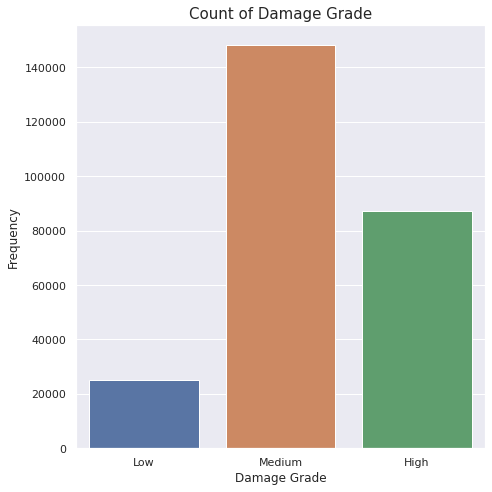

In [24]:
plt.figure(figsize=(7,7))

sns.set_theme()
sns.countplot(train['damage_grade'], order=['Low', 'Medium', 'High'])
plt.xlabel('Damage Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Count of Damage Grade', fontsize=15)
plt.tight_layout()
plt.show()

In [25]:
print('Jumlah Bangunan dengan tingkat kerusakan rendah : {}'.format(sum(train['damage_grade']=='Low')))
print('Jumlah Bangunan dengan tingkat kerusakan menengah : {}'.format(sum(train['damage_grade']=='Medium')))
print('Jumlah Bangunan dengan tingkat kerusakan tinggi : {}'.format(sum(train['damage_grade']=='High')))
print('')
print('Persentase Bangunan dengan tingkat kerusakan rendah : {:.2f}%'.format(sum(train['damage_grade']=='Low')/train.shape[0]*100))
print('Persentase Bangunan dengan tingkat kerusakan menengah : {:.2f}%'.format(sum(train['damage_grade']=='Medium')/train.shape[0]*100))
print('Persentase Bangunan dengan tingkat kerusakan tinggi : {:.2f}%'.format(sum(train['damage_grade']=='High')/train.shape[0]*100))

Jumlah Bangunan dengan tingkat kerusakan rendah : 25124
Jumlah Bangunan dengan tingkat kerusakan menengah : 148259
Jumlah Bangunan dengan tingkat kerusakan tinggi : 87218

Persentase Bangunan dengan tingkat kerusakan rendah : 9.64%
Persentase Bangunan dengan tingkat kerusakan menengah : 56.89%
Persentase Bangunan dengan tingkat kerusakan tinggi : 33.47%


Berdasarkan gambar di atas, terlihat bahwa jumlah bangunan dengan tingkat kerusakan mengengah adalah yang paling banyak yaitu sebesar 56.89% diikuti oleh bangunan dengan tingkat kerusakan tinggi sebesar 33.47% dan terakhir bangunan dengan tingkat kerusakan rendah sebesar 9.64%.

## **Check Between Feature and Label**

## **Univariate Analysis**

## **Geo Level and Damage Grade**

In [26]:
def plot_box(data, col_y, y_label, title, col_x = 'damage_grade', x_label = 'Damage Grade'):
    plt.figure(figsize=(7,7))
    sns.set_theme()
    sns.boxplot(data[col_x], data[col_y], order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

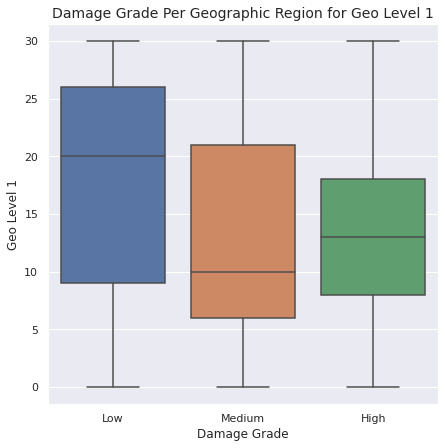

In [27]:
plot_box(train, 'geo_level_1_id', 'Geo Level 1','Damage Grade Per Geographic Region for Geo Level 1')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 1 memiliki tingkat kerusakan yang rendah. Bangunan dengan tingkat geografis level 1 dengan nilai diatas 9 hingga 26 mengalami kerusakan.

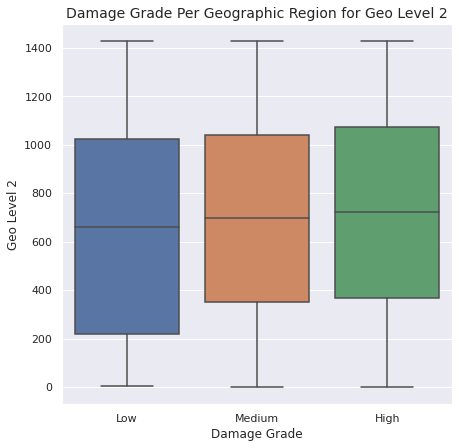

In [28]:
plot_box(train, 'geo_level_2_id', 'Geo Level 2','Damage Grade Per Geographic Region for Geo Level 2')

Berdasarkan gambar di atas, bangunan yang berada pada tingkat geografis level 2 memiliki tingkat kerusakan yang rendah. Bangunan dengan tingkat geografis level 2 dengan nilai diatas 200 hingga 1100 mengalami kerusakan.

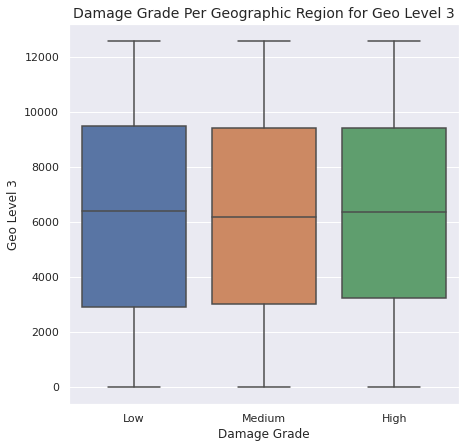

In [29]:
plot_box(train, 'geo_level_3_id', 'Geo Level 3','Damage Grade Per Geographic Region for Geo Level 3')

Berdasarkan gambar di atas, bangunan pada tingkat geografis 3 memiliki tingkat kerusakan yang hampir sama pada semua nilainya.

## **Number of Floor and Damage Grade**

In [30]:
train['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

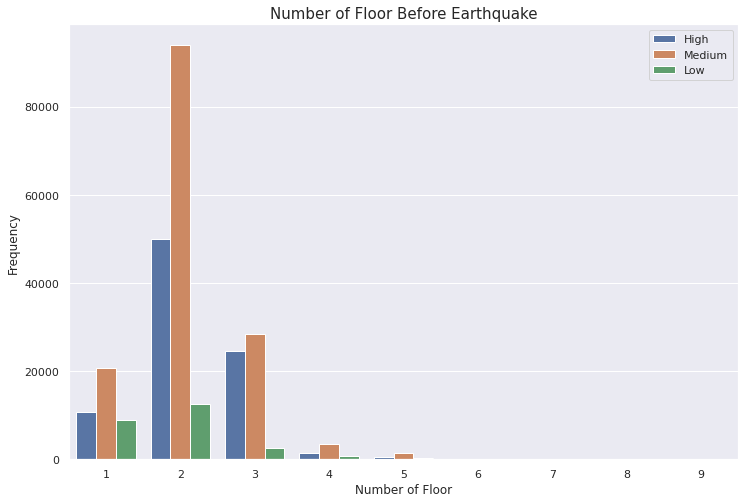

In [31]:
plt.figure(figsize=(12,8))

sns.countplot(train['count_floors_pre_eq'], hue=train['damage_grade'])
plt.xlabel('Number of Floor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Number of Floor Before Earthquake', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## **Age and Damage Grade**

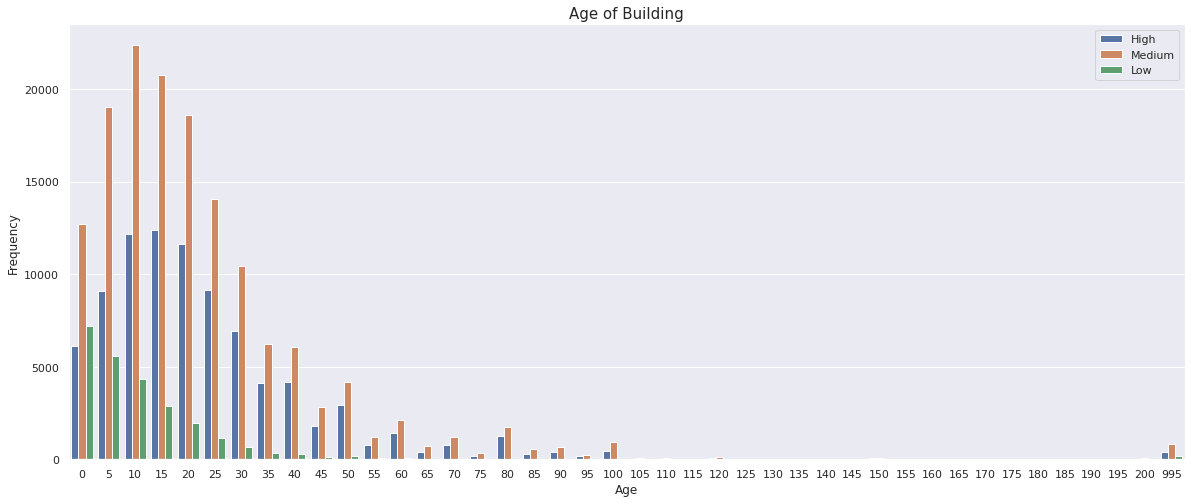

In [32]:
plt.figure(figsize=(20,8))

sns.countplot(train['age'], hue=train['damage_grade'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age of Building', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Pada gambar di atas, terlihat bahwa persebaran umur bangunan adalah pada rentang 0-200 tahun kemudian dilanjut dengan umur bangunan lebih dari 950 tahun. Oleh karena itu, akan dibagi plot di atas ke dalam 4 buah segmen yaitu pada range 0-50 tahun, 51-100 tahun, 101-150 tahun, dan lebih dari 150 tahun.

**Segment 1 (0 to 50 years old building)**

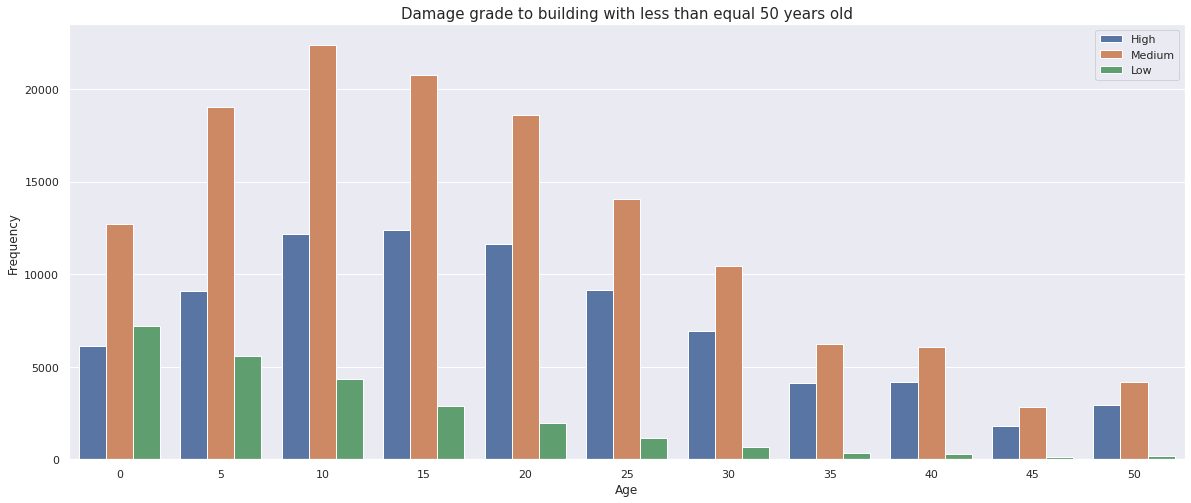

In [33]:
plt.figure(figsize=(20,8))

segment_1_age = train[train['age']<=50]
sns.countplot(segment_1_age['age'], hue=segment_1_age['damage_grade'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with less than equal 50 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Berdasarkan gambar di atas, terlihat bahwa pada umur bangunan antara 0 hingga 50 tahun, tingkat kerusakan bangunan paling banyak adalah tingkat kerusakan sedang. Pada umur bangunan antara 0 hingga 40 tahun terlihat bangunan dengan tingkat kerusakan ringan mengalami penurunan.

**Segment 2 (51 to 100 years old building)**

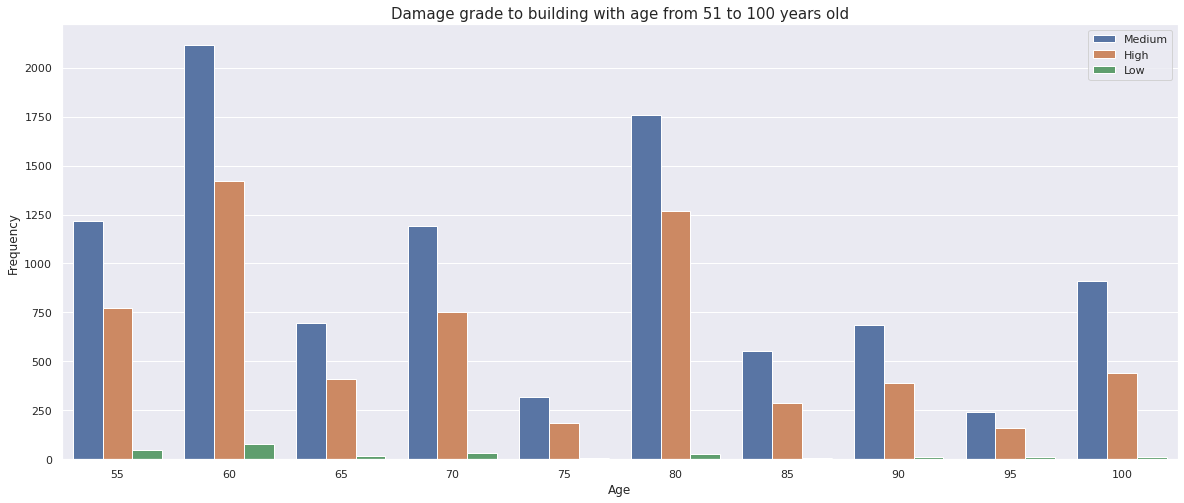

In [34]:
plt.figure(figsize=(20,8))

segment_2_age = train[(train['age']>50) & (train['age']<=100)]
sns.countplot(segment_2_age['age'], hue=segment_2_age['damage_grade'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 51 to 100 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Berdasarkan gambar di atas, terlihat bahwa pada umur bangunan antara 51 hingga 100 tahun, tingkat kerusakan bangunan paling banyak adalah tingkat kerusakan sedang. Pada umur bangunan antara 51 hingga 100, hanya ada sedikit bangunan yang mengalami tingkat kerusakan ringan.

**Segment 3 (101 to 150 years old building)**

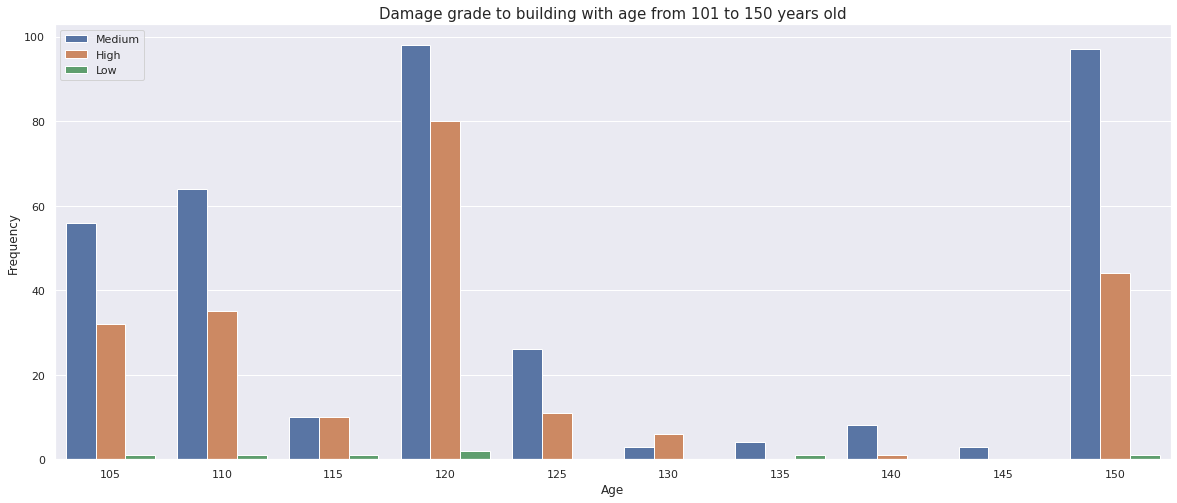

In [35]:
plt.figure(figsize=(20,8))

segment_3_age = train[(train['age']>100) & (train['age']<=150)]
sns.countplot(segment_3_age['age'], hue=segment_3_age['damage_grade'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 101 to 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Beberapa bangunan yang mempunyai umur antara 101 hingga 150 tahun mengalami tingkat kerusakan yang didominasi tingkat kerusakan mengengah dan tinggi.

**Segment 4 (150 to 1000 years old building)**

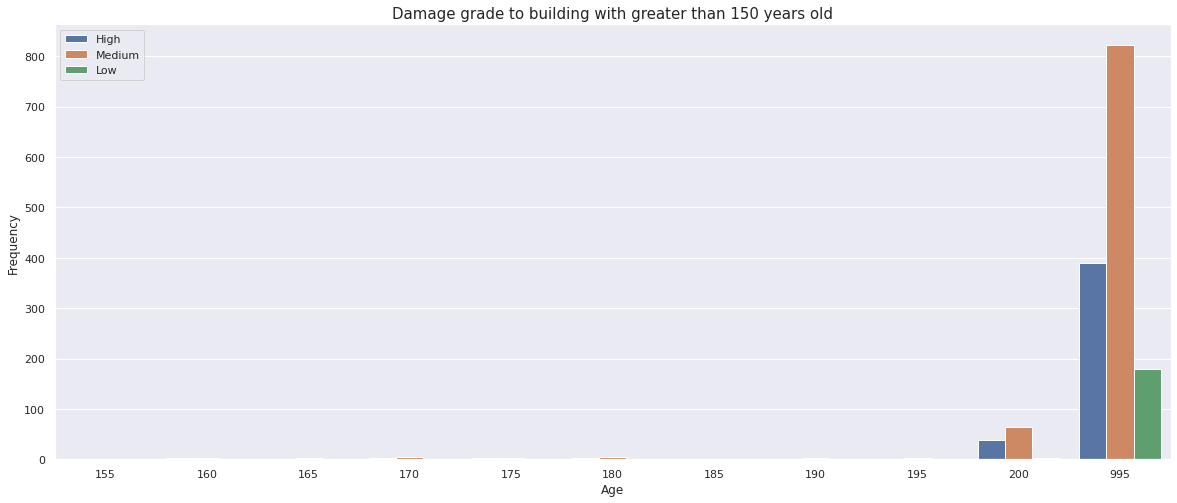

In [36]:
plt.figure(figsize=(20,8))

segment_4_age = train[train['age']>150]
sns.countplot(segment_4_age['age'], hue=segment_4_age['damage_grade'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with greater than 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Berdasarkan gambar di atas, terdapat bangunan yang mempunyai umur lebih dari 200 tahun dan mengalami tingkat kerusakan baik itu rendah, menengah, dan tinggi.

## **Area Percentage and Damage Grade**

In [37]:
train['area_percentage'].unique()

array([  6,   8,   5,   9,   3,  13,   7,   4,  12,  16,  11,  27,  10,
        15,  14,  17,  21,  37,  19,   2,  28,  38,  56,   1,  20,  24,
        34,  26,  18,  31,  25,  23,  22,  32,  47,  36,  40,  29,  42,
        55,  35,  39, 100,  50,  51,  43,  30,  62,  85,  33,  45,  52,
        57,  49,  67,  66,  54,  75,  65,  58,  48,  64,  63,  46,  59,
        86,  78,  41,  44,  61,  70,  77,  73,  72,  53,  60,  84,  83,
        76,  96,  80,  90,  82,  69])

In [38]:
train['area_percentage'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64

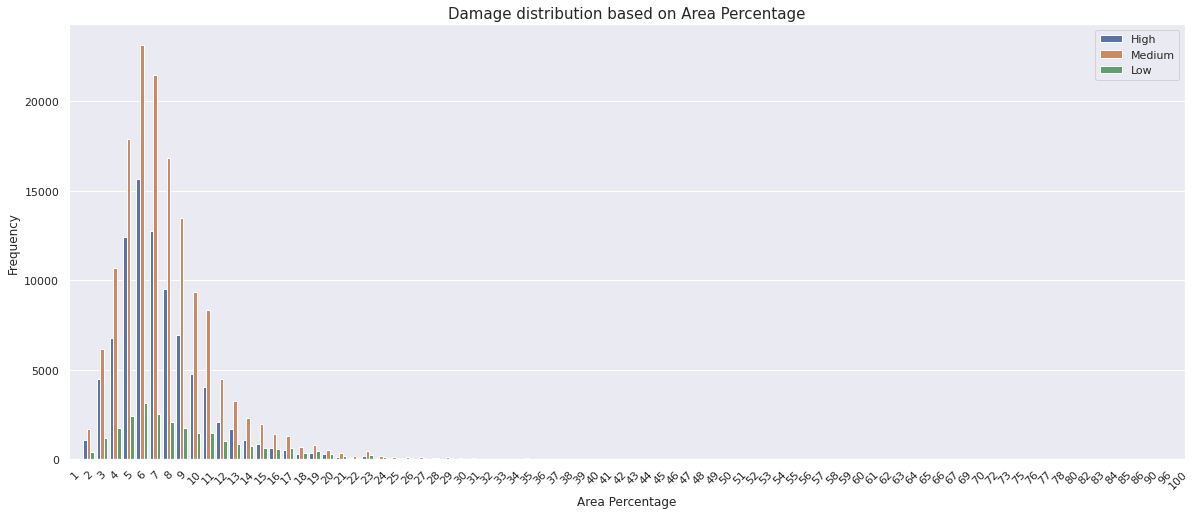

In [39]:
plt.figure(figsize=(20,8))

sns.countplot(train['area_percentage'], hue=train['damage_grade'])
plt.xlabel('Area Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Area Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## **Height Percentage and Damage Grade**

In [40]:
train['height_percentage'].unique()

array([ 5,  7,  9,  4,  6,  3, 10,  8,  2, 32, 12, 11, 13, 16, 15, 18, 26,
       17, 19, 14, 20, 23, 21, 25, 24, 28, 31])

In [41]:
train['height_percentage'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

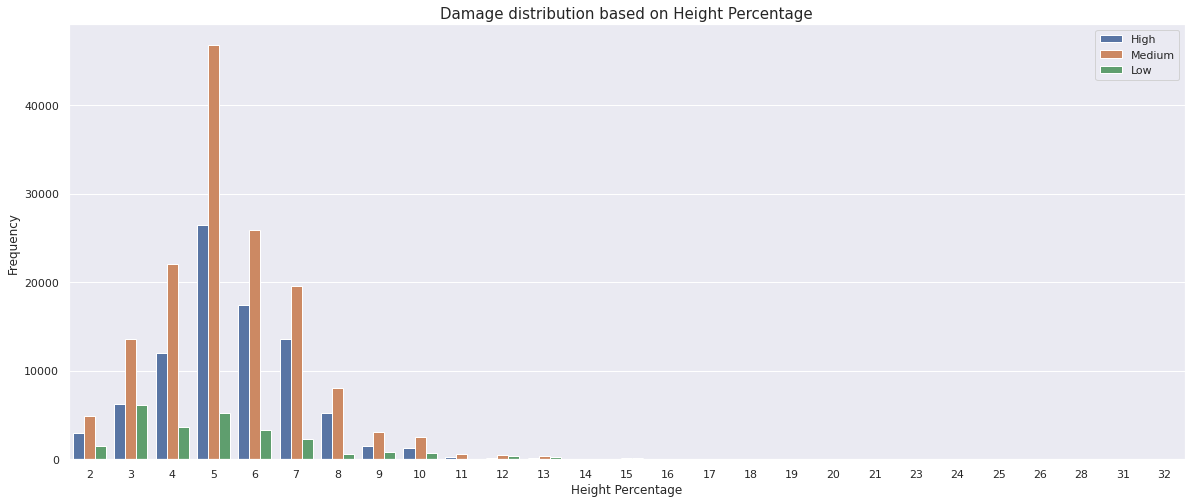

In [42]:
plt.figure(figsize=(20,8))

sns.countplot(train['height_percentage'], hue=train['damage_grade'])
plt.xlabel('Height Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Height Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## **Count Families and Damage Grade**

In [43]:
train['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

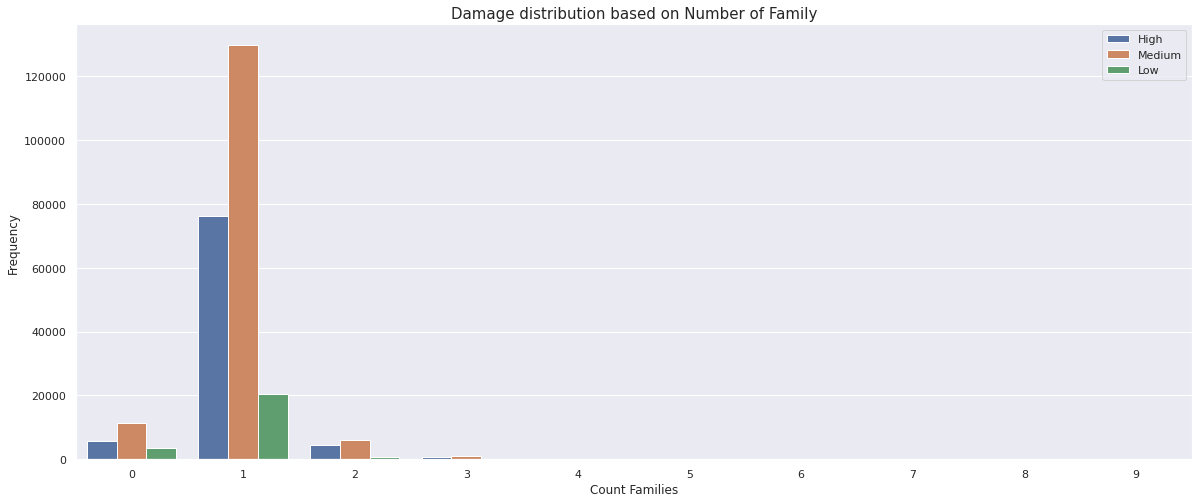

In [44]:
plt.figure(figsize=(20,8))

sns.countplot(train['count_families'], hue=train['damage_grade'])
plt.xlabel('Count Families', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Number of Family', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## **Categorical Feature and Damage Grade**

**Land Surface Condition and Damage Grade**

In [45]:
train['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

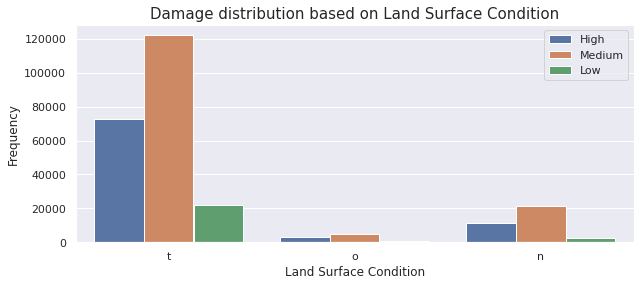

In [46]:
plt.figure(figsize=(10,4))

sns.countplot(train['land_surface_condition'], hue=train['damage_grade'])
plt.xlabel('Land Surface Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Land Surface Condition', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Foundation Type and Damage Grade**

In [47]:
train['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

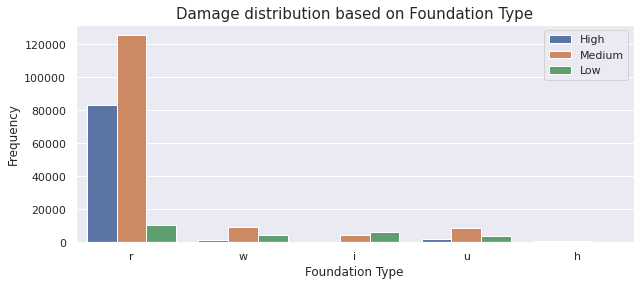

In [48]:
plt.figure(figsize=(10,4))

sns.countplot(train['foundation_type'], hue=train['damage_grade'])
plt.xlabel('Foundation Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Foundation Type', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Roof Type and Damage Grade**

In [49]:
train['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

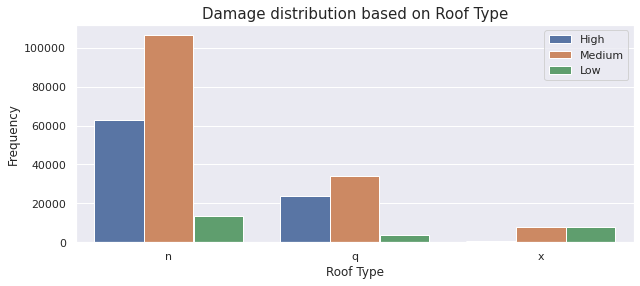

In [50]:
plt.figure(figsize=(10,4))

sns.countplot(train['roof_type'], hue=train['damage_grade'])
plt.xlabel('Roof Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Roof Type', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Ground Floor Type and Damage Grade**

In [51]:
train['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

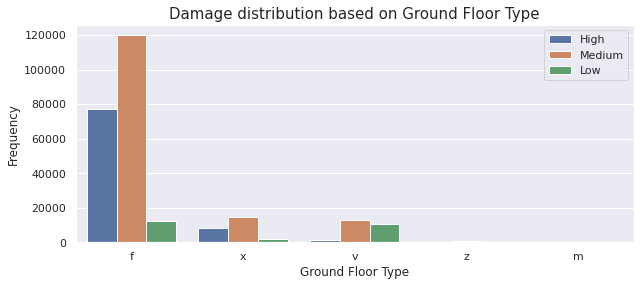

In [52]:
plt.figure(figsize=(10,4))

sns.countplot(train['ground_floor_type'], hue=train['damage_grade'])
plt.xlabel('Ground Floor Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Ground Floor Type', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Other Floor Type and Damage Grade**

In [53]:
train['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

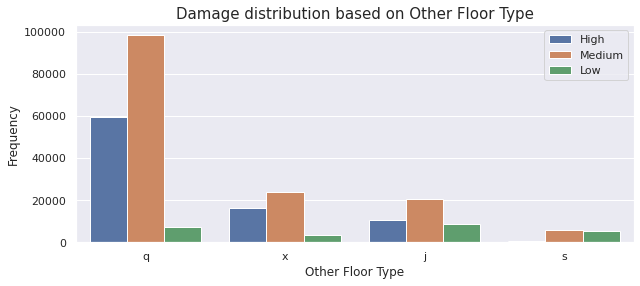

In [54]:
plt.figure(figsize=(10,4))

sns.countplot(train['other_floor_type'], hue=train['damage_grade'])
plt.xlabel('Other Floor Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Other Floor Type', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Position and Damage Grade**

In [55]:
train['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

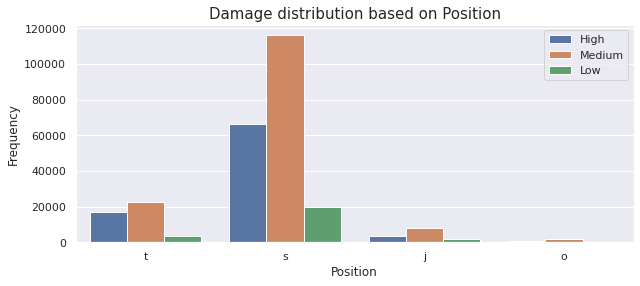

In [56]:
plt.figure(figsize=(10,4))

sns.countplot(train['position'], hue=train['damage_grade'])
plt.xlabel('Position', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Position', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Plan Configuration and Damage Grade**

In [57]:
train['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

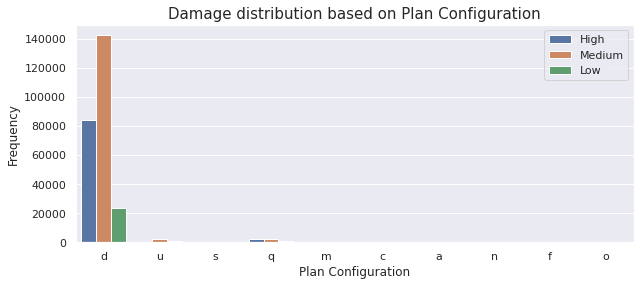

In [58]:
plt.figure(figsize=(10,4))

sns.countplot(train['plan_configuration'], hue=train['damage_grade'])
plt.xlabel('Plan Configuration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Plan Configuration', fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Legal Ownership Status**

In [59]:
train['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

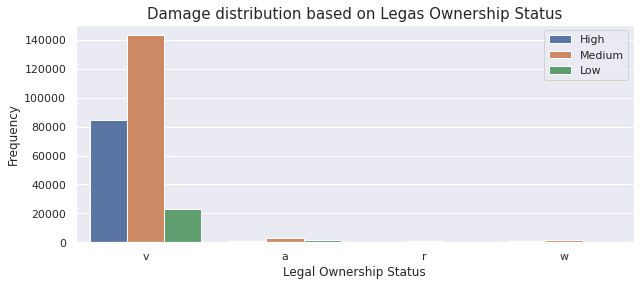

In [60]:
plt.figure(figsize=(10,4))

sns.countplot(train['legal_ownership_status'], hue=train['damage_grade'])
plt.xlabel('Legal Ownership Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Legas Ownership Status', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## **Numerical Feature (Binary) and Damage Grade**

In [61]:
def count_plot(data, col_x, x_label, title, y_label='Frecuency', col_y = 'damage_grade'):
    plt.figure(figsize=(10,4))

    p = sns.countplot(data[col_x], hue=data[col_y])
    plt.xlabel(x_label, fontsize=12)
    p.set_xticklabels(['No', 'Yes'])
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Damage distribution that has {}'.format(title), fontsize=15)
    plt.legend(loc='upper right')
    plt.show()

**Has Superstructure Adobe Mud**

In [62]:
train['has_superstructure_adobe_mud'].value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

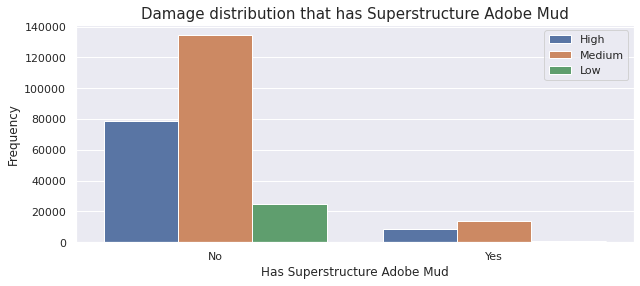

In [63]:
count_plot(train, 'has_superstructure_adobe_mud', 'Has Superstructure Adobe Mud', 'Superstructure Adobe Mud')

**Has Superstructure Mud Mortar Stone**

In [64]:
train['has_superstructure_mud_mortar_stone'].value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

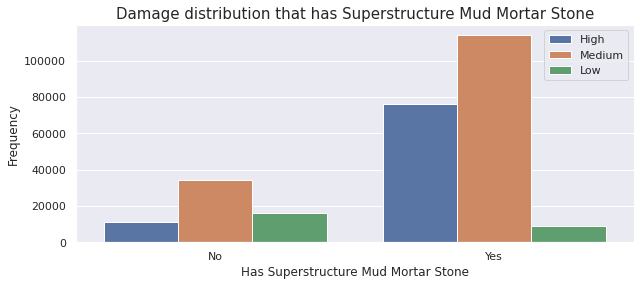

In [65]:
count_plot(train, 'has_superstructure_mud_mortar_stone', 'Has Superstructure Mud Mortar Stone', 'Superstructure Mud Mortar Stone')

**Has Superstructure Stone Flag**

In [66]:
train['has_superstructure_stone_flag'].value_counts()

0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

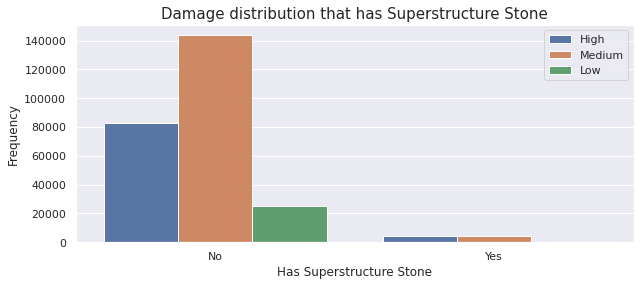

In [67]:
count_plot(train, 'has_superstructure_stone_flag', 'Has Superstructure Stone', 'Superstructure Stone')

**Has Superstructure Cement Mortar Stone**

In [68]:
train['has_superstructure_cement_mortar_stone'].value_counts()

0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

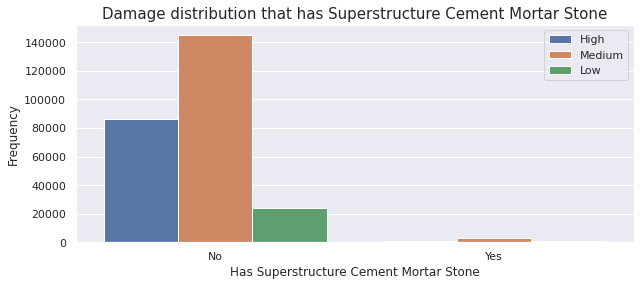

In [69]:
count_plot(train, 'has_superstructure_cement_mortar_stone', 'Has Superstructure Cement Mortar Stone', 'Superstructure Cement Mortar Stone')

**Has Superstructure Mud Mortar Brick**

In [70]:
train['has_superstructure_mud_mortar_brick'].value_counts()

0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

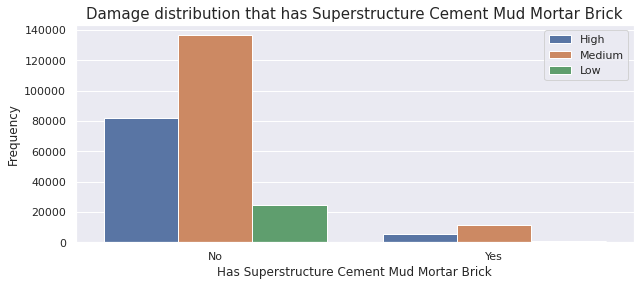

In [71]:
count_plot(train, 'has_superstructure_mud_mortar_brick', 'Has Superstructure Cement Mud Mortar Brick', 'Superstructure Cement Mud Mortar Brick')

**Has Superstructure Cement Mortar Brick**

In [72]:
train['has_superstructure_cement_mortar_brick'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

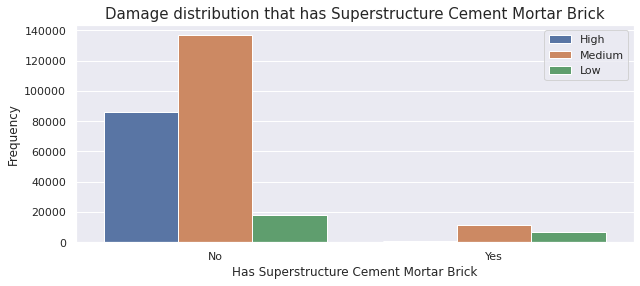

In [73]:
count_plot(train, 'has_superstructure_cement_mortar_brick', 'Has Superstructure Cement Mortar Brick', 'Superstructure Cement Mortar Brick')

**Has Superstructure Timber**

In [74]:
train['has_superstructure_timber'].value_counts()

0    194151
1     66450
Name: has_superstructure_timber, dtype: int64

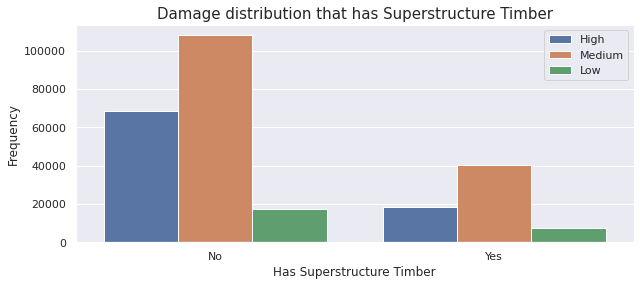

In [75]:
count_plot(train, 'has_superstructure_timber', 'Has Superstructure Timber', 'Superstructure Timber')

**Has Superstructure Bamboo**

In [76]:
train['has_superstructure_bamboo'].value_counts()

0    238447
1     22154
Name: has_superstructure_bamboo, dtype: int64

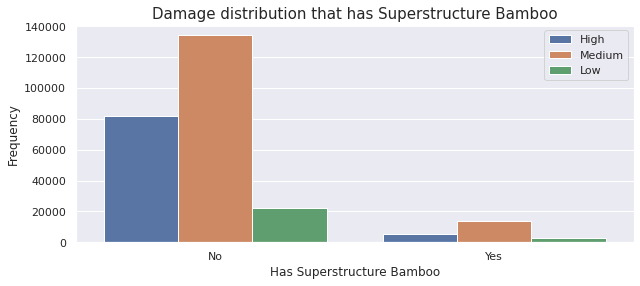

In [77]:
count_plot(train, 'has_superstructure_bamboo', 'Has Superstructure Bamboo', 'Superstructure Bamboo')

**Has Superstructure RC Non Engineered**

In [78]:
train['has_superstructure_rc_non_engineered'].value_counts()

0    249502
1     11099
Name: has_superstructure_rc_non_engineered, dtype: int64

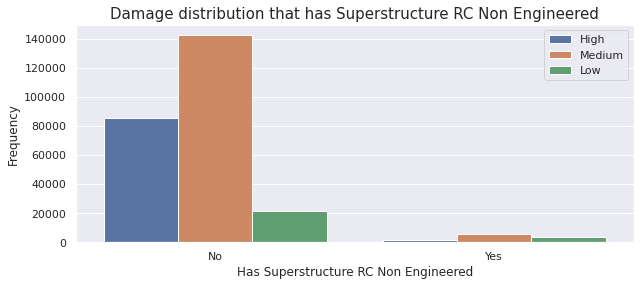

In [79]:
count_plot(train, 'has_superstructure_rc_non_engineered', 'Has Superstructure RC Non Engineered', 'Superstructure RC Non Engineered')

**Has Superstructure RC Engineered**

In [80]:
train['has_superstructure_rc_engineered'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

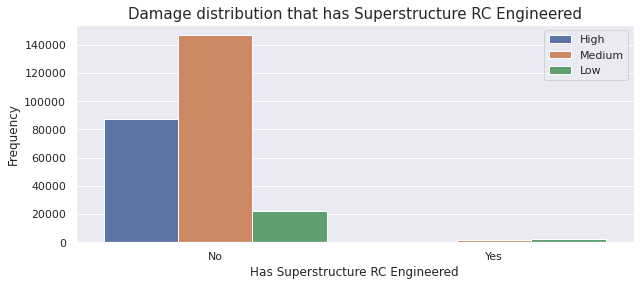

In [81]:
count_plot(train, 'has_superstructure_rc_engineered', 'Has Superstructure RC Engineered', 'Superstructure RC Engineered')

**Has Superstructure Other**

In [82]:
train['has_superstructure_other'].value_counts()

0    256696
1      3905
Name: has_superstructure_other, dtype: int64

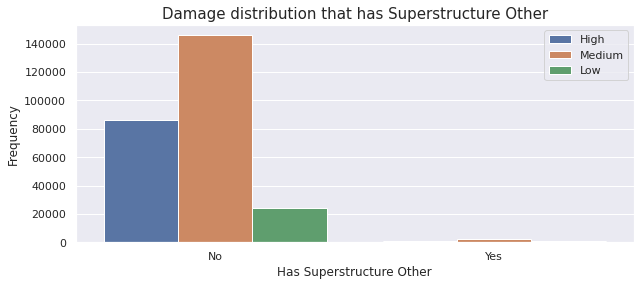

In [83]:
count_plot(train, 'has_superstructure_other', 'Has Superstructure Other', 'Superstructure Other')

**Has Secondary Use**

In [84]:
train['has_secondary_use'].value_counts()

0    231445
1     29156
Name: has_secondary_use, dtype: int64

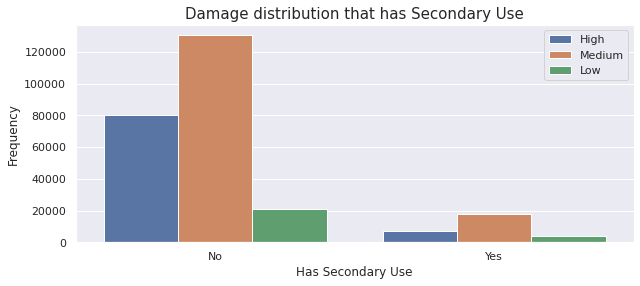

In [85]:
count_plot(train, 'has_secondary_use', 'Has Secondary Use', 'Secondary Use')

**Has Secondary Use Agriculture**

In [86]:
train['has_secondary_use_agriculture'].value_counts()

0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64

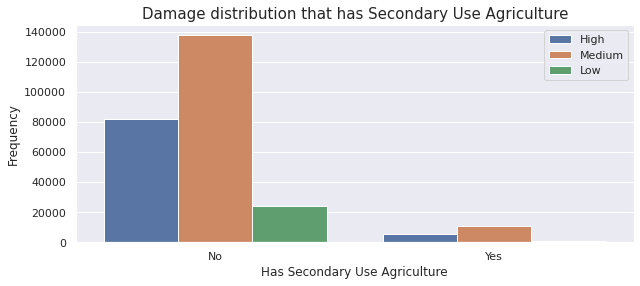

In [87]:
count_plot(train, 'has_secondary_use_agriculture', 'Has Secondary Use Agriculture', 'Secondary Use Agriculture')

**Has Secondary Use Hotel**

In [88]:
train['has_secondary_use_hotel'].value_counts()

0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64

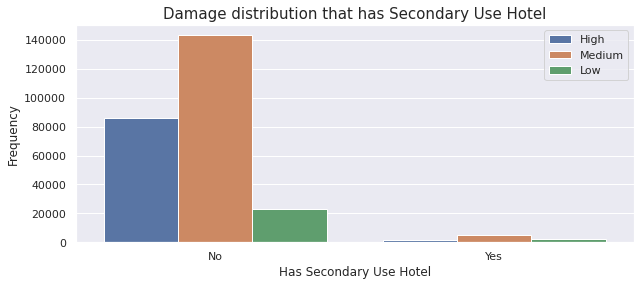

In [89]:
count_plot(train, 'has_secondary_use_hotel', 'Has Secondary Use Hotel', 'Secondary Use Hotel')

**Has Secondary Use Rental**

In [90]:
train['has_secondary_use_rental'].value_counts()

0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64

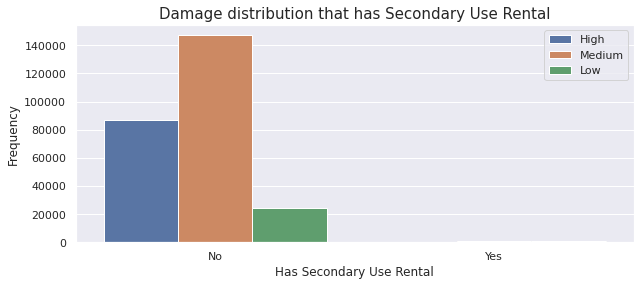

In [91]:
count_plot(train, 'has_secondary_use_rental', 'Has Secondary Use Rental', 'Secondary Use Rental')

**Has Secondary Use Institution**

In [92]:
train['has_secondary_use_institution'].value_counts()

0    260356
1       245
Name: has_secondary_use_institution, dtype: int64

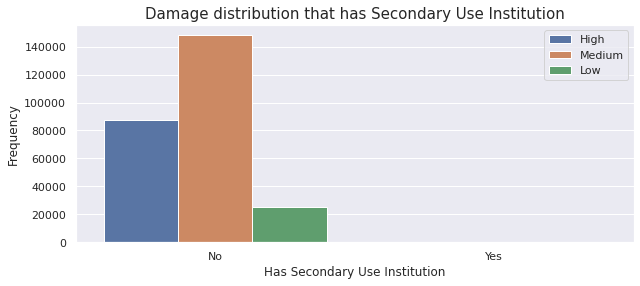

In [93]:
count_plot(train, 'has_secondary_use_institution', 'Has Secondary Use Institution', 'Secondary Use Institution')

**Has Secondary Use School**

In [94]:
train['has_secondary_use_school'].value_counts()

0    260507
1        94
Name: has_secondary_use_school, dtype: int64

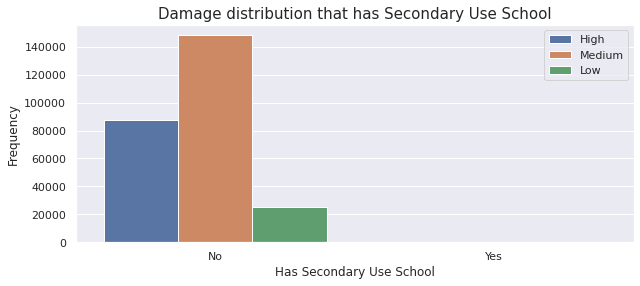

In [95]:
count_plot(train, 'has_secondary_use_school', 'Has Secondary Use School', 'Secondary Use School')

**Has Secondary User Industry**

In [96]:
train['has_secondary_use_industry'].value_counts()

0    260322
1       279
Name: has_secondary_use_industry, dtype: int64

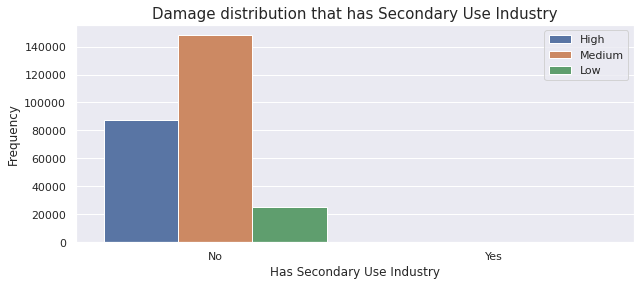

In [97]:
count_plot(train, 'has_secondary_use_industry', 'Has Secondary Use Industry', 'Secondary Use Industry')

**Has Secondary Use Health Post**

In [98]:
train['has_secondary_use_health_post'].value_counts()

0    260552
1        49
Name: has_secondary_use_health_post, dtype: int64

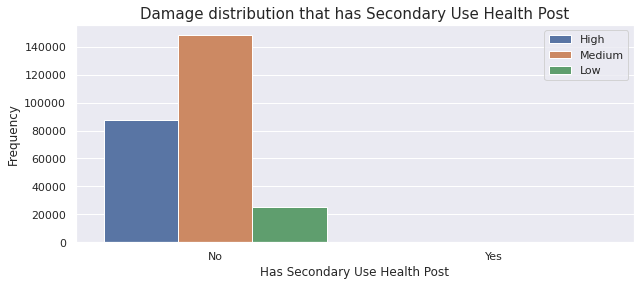

In [99]:
count_plot(train, 'has_secondary_use_health_post', 'Has Secondary Use Health Post', 'Secondary Use Health Post')

**Has Secondary Use Goverment Office**

In [100]:
train['has_secondary_use_gov_office'].value_counts()

0    260563
1        38
Name: has_secondary_use_gov_office, dtype: int64

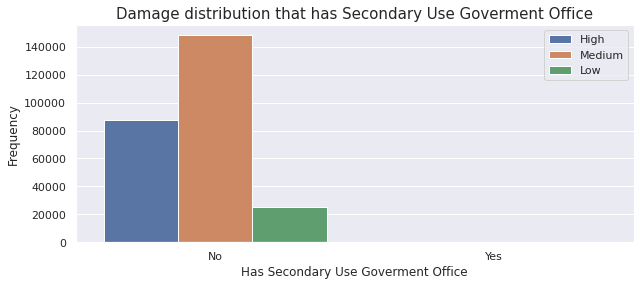

In [101]:
count_plot(train, 'has_secondary_use_gov_office', 'Has Secondary Use Goverment Office', 'Secondary Use Goverment Office')

**Has Secondary Use Police**

In [102]:
train['has_secondary_use_use_police'].value_counts()

0    260578
1        23
Name: has_secondary_use_use_police, dtype: int64

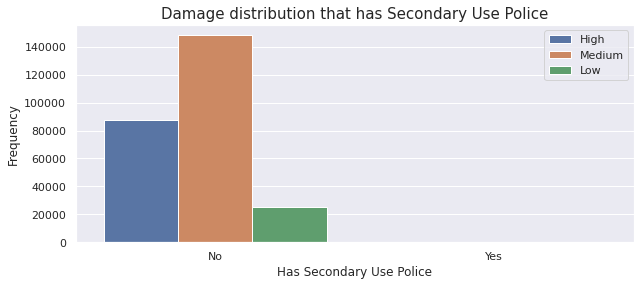

In [103]:
count_plot(train, 'has_secondary_use_use_police', 'Has Secondary Use Police', 'Secondary Use Police')

**Has Secondary Use Other**

In [104]:
train['has_secondary_use_other'].value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

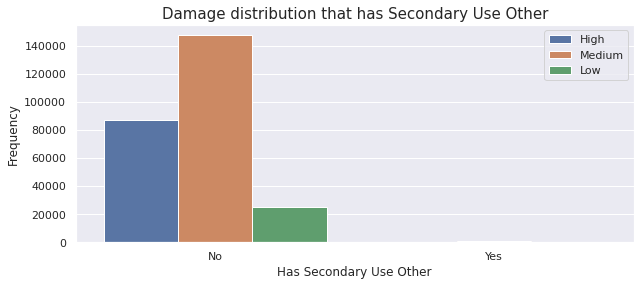

In [105]:
count_plot(train, 'has_secondary_use_other', 'Has Secondary Use Other', 'Secondary Use Other')

## **Multivariate Analysis**

In [106]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [107]:
features = train

In [108]:
features['damage_grade'] = features['damage_grade'].replace({'Low':1, 'Medium':2, 'High':3})
features['damage_grade'] = features['damage_grade'].astype('int64')

In [109]:
corr_matrix = features.corr()
corr_matrix

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,0.001443,-0.000827,-0.003768,0.001933,0.001967,0.001266,0.002472,-0.002259,0.002171,-0.000599,0.002606,0.002631,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,0.007677,0.023656,-0.028854,0.134121,0.144985,0.074169,0.016454,0.015767,0.022670,0.035108,-0.010428,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,-0.008743,-0.009122,0.014246,-0.079875,-0.023927,-0.032588,-0.038173,-0.036074,-0.020144,-0.012439,-0.001519,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,0.019579,0.005966,-0.023278,-0.005116,-0.003916,0.006143,0.002265,-0.012420,-0.010604,-0.002479,0.007375,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,-0.041058,-0.011329,0.257279,-0.085821,-0.056637,-0.070487,0.007448,0.049000,-0.029888,0.086586,0.052125,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.001476,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,0.009129,-0.012128,0.079525,-0.036992,0.005855,-0.008374,-0.025431,-0.025552,-0.001520,0.005309,-0.008788,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,-0.002070,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,-0.000473,0.073701,0.053362,0.210800,-0.053965,-0.031641,0.185047,0.224647,0.007928,0.088630,0.122401,-0.016478,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,0.000096,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,-0.020260,0.012960,0.209098,0.001698,-0.052402,-0.063342,0.086228,0.129698,-0.019266,0.064316,0.091780,-0.005390,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
has_superstructure_adobe_mud,-0.000307,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,0.006962,-0.014554,0.314979,-0.037549,0.011694,0.011528,-0.036830,-0.036782,0.057545,0.033068,-0.013300,-0.003917,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,0.002423,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,-0.034046,-0.104288,-0.376208,-0.470715,-0.040177,-0.054657,-0.222366,-0.224509,-0.041705,0.001576,-0.087520,0.058261,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628

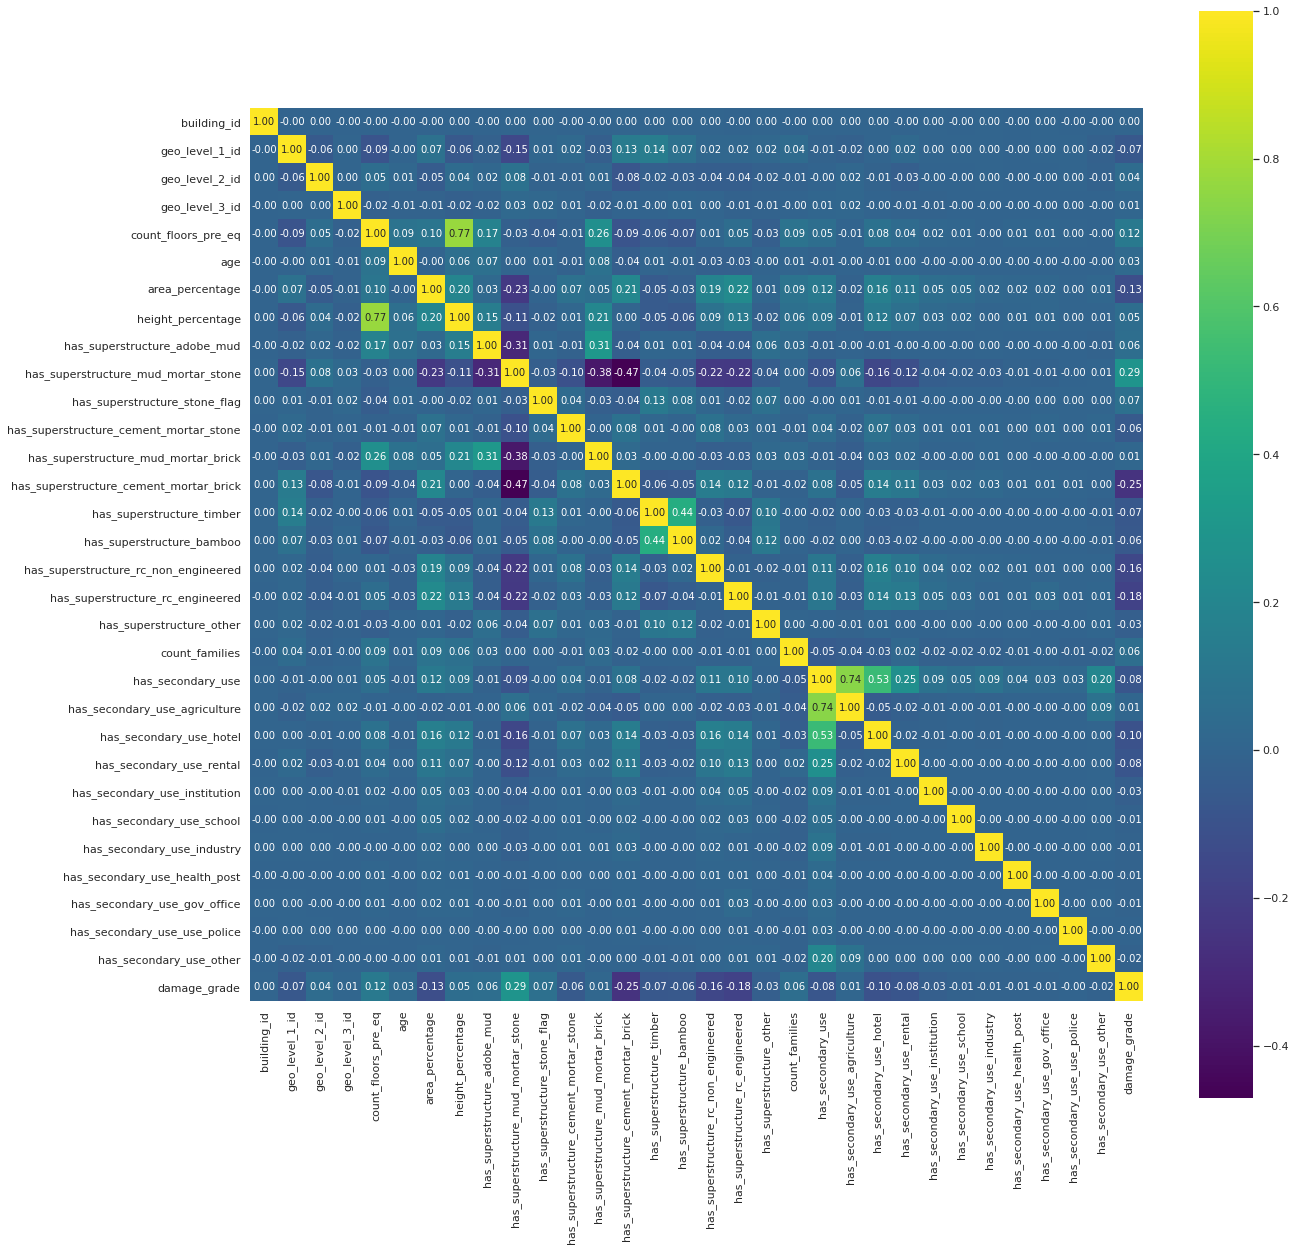

In [110]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

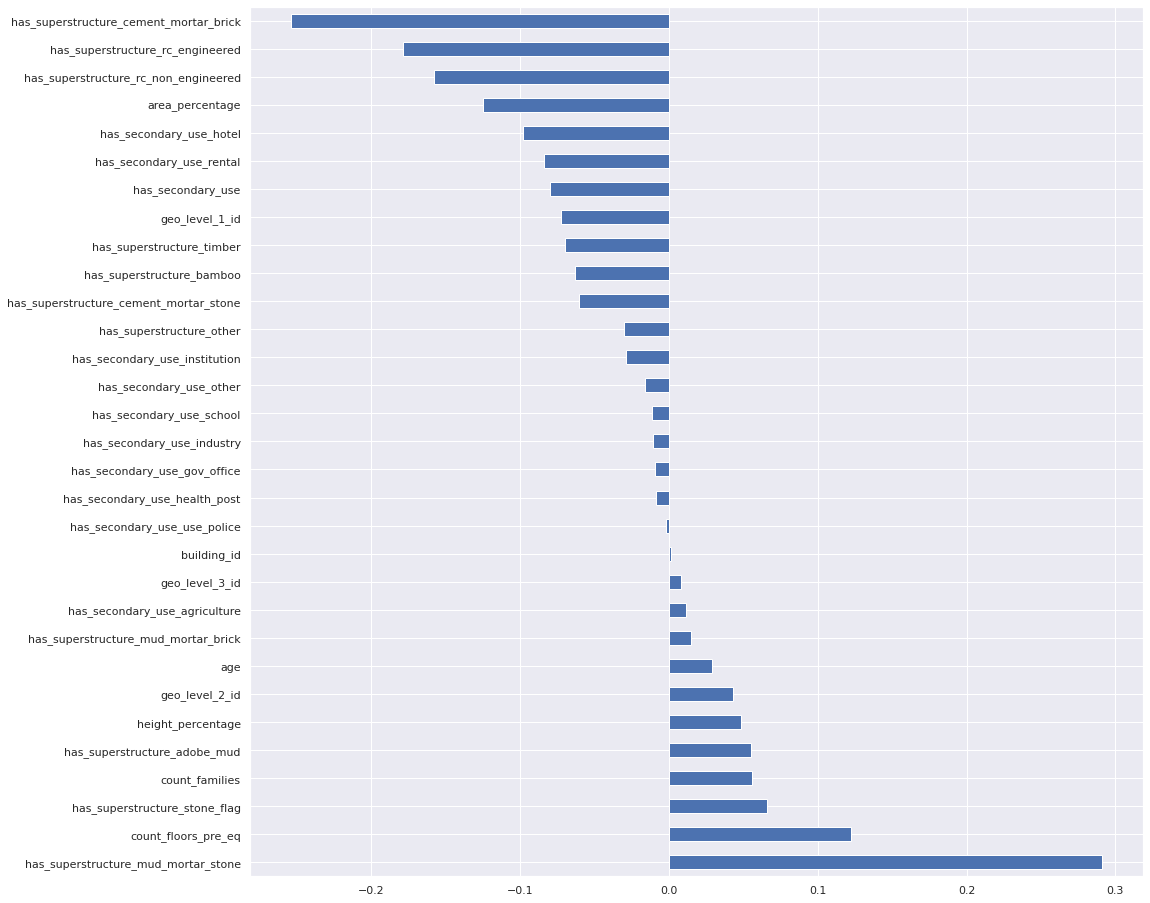

In [111]:
plt.figure(figsize=(16,16))

corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
plt.show()